In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 「Airplane.bmp」を読み込み，画像を表示するプログラムを実装せよ．

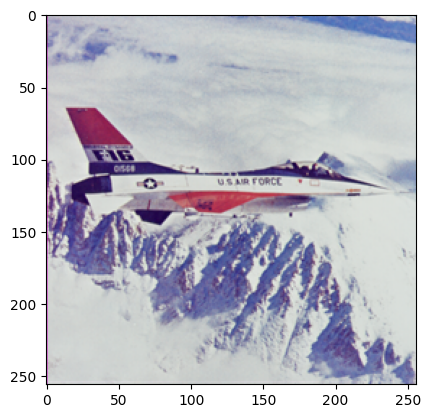

In [43]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(image_rgb)

# 「Airplane.bmp」を読み込み，その画像の幅と高さを出力するプログラムを実装せよ．

In [44]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape
print(f"width: {width} height: {height}")

width: 256 height: 256


# 「Airplane.bmp」を読み込み，画像を中心から90度回転させた結果を表示するプログラムを実装せよ．

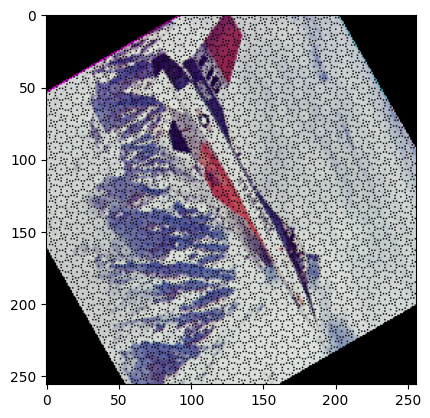

In [45]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 回転角度
theta = np.radians(60)

# 変換行列
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# 画像の中心を原点として回転
for y in range(height):
    for x in range(width):
        X = np.array([x-width/2, y-height/2])
        (x2, y2) = np.dot(A, X) + (width/2, height/2)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)

# 「Airplane.bmp」を読み込み，縦に2倍，横に0.5倍に拡大縮小する変換行列を適用し，結果を表示するプログラムを実装せよ．

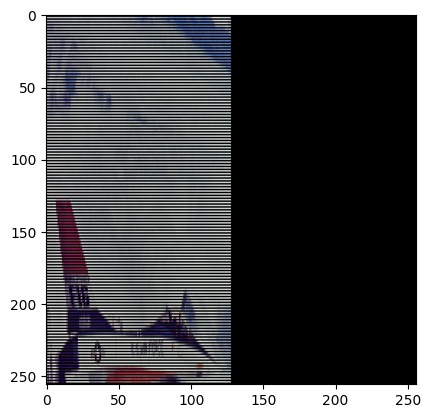

In [46]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列（1/2に縮小）
A = np.array([[0.5, 0],
              [0, 2]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y])
        (x2, y2) = np.dot(A, X) # 線形変換で新しい座標を算出
        if 0 <= x2 < width and 0 <= y2 < height:
	        output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)

# 「Airplane.bmp」を読み込み，画像を右に100ピクセル，下に50ピクセル移動するプログラムを実装せよ．

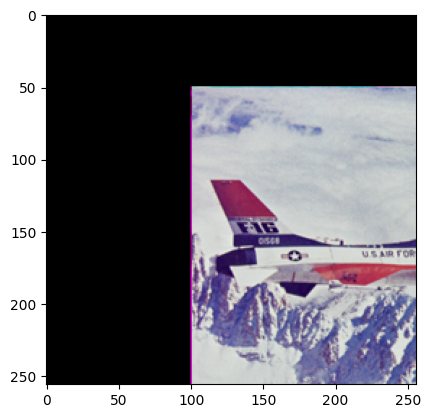

In [47]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        x2 = x + 100
        y2 = y + 50
        if 0 <= x2 < width and 0 <= y2 < height:
	        output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)

# 「Airplane.bmp」を読み込み，画像を2倍に拡大する際に最近傍補完法を用いて補間を行うプログラムを実装せよ．

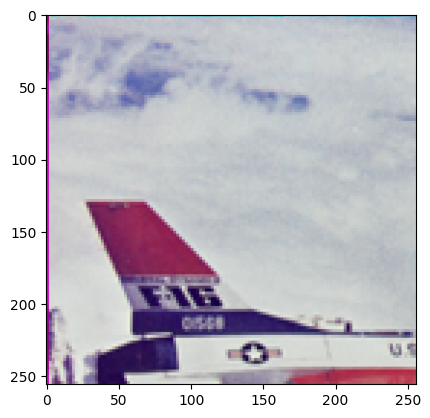

In [48]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列
A = np.array([[2, 0],
              [0, 2]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# 逆行列（1/2に縮小）
A_inv = np.linalg.inv(A)

# 変換後の画像に対応する元の画像のピクセルを選択
for y in range(height*2):
    for x in range(width*2):
        X = np.array([x, y])
        (x2, y2) = np.dot(A_inv, X)
        if 0 <= x < width and 0 <= y < height:
            output_image[y, x] = image_rgb[int(y2), int(x2)]

# 画像の表示
plt.imshow(output_image)

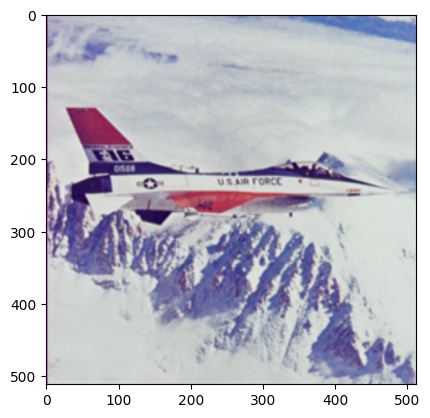

In [49]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# バイリニア補完法を用いて画像を2倍に拡大
scaled_image = cv2.resize(image_rgb, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# 画像の表示
plt.imshow(scaled_image)

# 「Airplane.bmp」を読み込み，画像にアフィン変換を適用して，80%に縮小しつつ右下に64ピクセル移動させるプログラムを実装せよ（cv2.warpPerspective関数を用いること）．

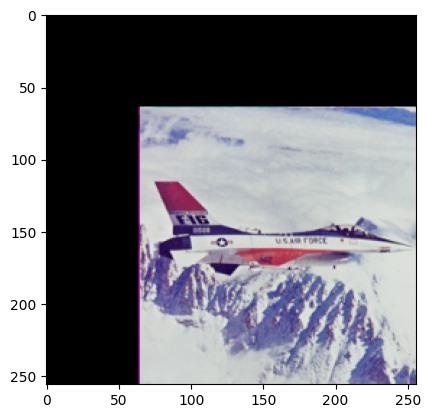

In [50]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 変換行列
A = np.array([[0.8, 0, 64],
              [0, 0.8, 64],
              [0, 0, 1]], dtype=np.float64)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height))

# 画像の表示
plt.imshow(output_image)

# 「Airplane.bmp」を読み込み，四隅の座標を[[30, 50], [20, 230], [240, 190], [200, 40]]へ移動させる射影変換を適用し，結果を表示するプログラムを実装せよ（cv2.arpPerspective関数を用いること）．

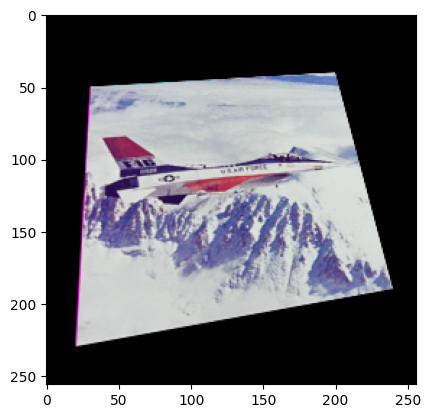

In [51]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Airplane.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# 対応する4点の座標を指定
src_pts = np.array([[0, 0], [0, height], [width, height], [width, 0]], dtype=np.float32)
dst_pts = np.array([[30, 50], [20, 230], [240, 190], [200, 40]], dtype=np.float32)

# 変換行列を生成
A = cv2.getPerspectiveTransform(src_pts, dst_pts)

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height))

# 画像の表示
plt.imshow(output_image)